In [1]:
from wfOpto import *
from scipy.ndimage import gaussian_filter1d

pytoolsAL: Modules missing.  Not loading neuropixels.  Message: No module named 'slidingRP'


In [2]:
data822 = wfOpto(Path(r'Z:\Subjects\ZYE_0069\2023-08-22\1'))

In [3]:
np.unique(data822.laserPowers)

array([0.1 , 0.15, 0.2 , 0.3 , 0.5 , 0.75, 1.  , 1.5 ])

In [4]:
powTrials= np.squeeze(np.argwhere(data822.laserPowers==1.5))

Text(0.5, 1.0, 'activities by power')

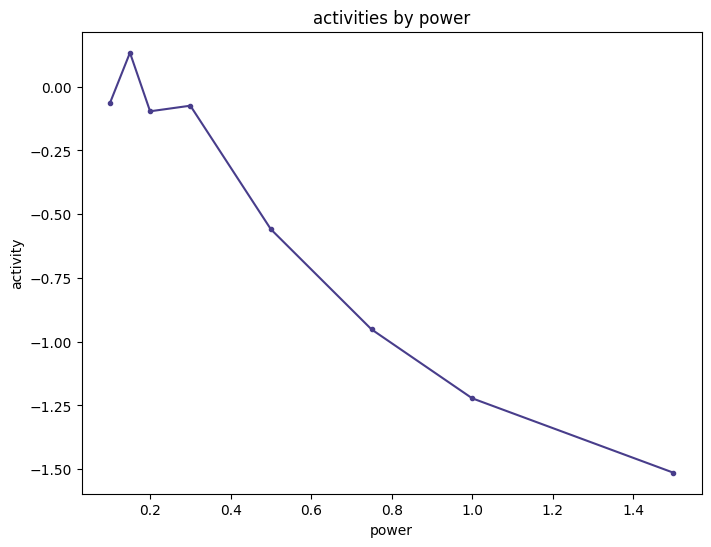

In [7]:
activitiesByPower = np.zeros((2,8))
f = plt.figure(figsize=(4*2, 3*2))
gs = mpl.gridspec.GridSpec(3, 4)
spatial = data822.svdSpatFull.reshape(560*560, -1)
pixel_ix = np.ravel_multi_index((246,198), (data822.py, data822.py)) # the pixel
for count,power in enumerate(np.unique(data822.laserPowers)):
    trials = np.squeeze(np.argwhere(data822.laserPowers==power)) # the trials
    time = [np.linspace(i+0.07, i+0.1, 100) for i in data822.laserOn[trials]] 

    powerVid = []
    for iT, timept in enumerate(time): # the timepoints
        activity = data822.tToWFManual(timept) # activity for that time point
        dwf = [np.diff(i, prepend=i[0]) for i in activity.T]
        dwf = np.array(dwf)
        video = spatial[pixel_ix] @ dwf # video at that time point
        powerVid.append(video) # appending a vid of that pixel at that time pt 

    meanForPower = np.mean(powerVid)
    activitiesByPower[0][count] = power
    activitiesByPower[1][count] = meanForPower
plt.plot(activitiesByPower[0], activitiesByPower[1],color='darkslateblue', marker='.')
# plt.fill_between(activitiesByPower[0], \
#                  np.mean(activitiesByPower, axis=0)-scipy.stats.sem(activitiesByPower,axis=0),\
#                  np.mean(activitiesByPower,axis=0)+scipy.stats.sem(activitiesByPower,axis=0), color='lavender')
plt.xlabel("power")
plt.ylabel("activity")
plt.title(f'activities by power')

<Figure size 800x600 with 0 Axes>

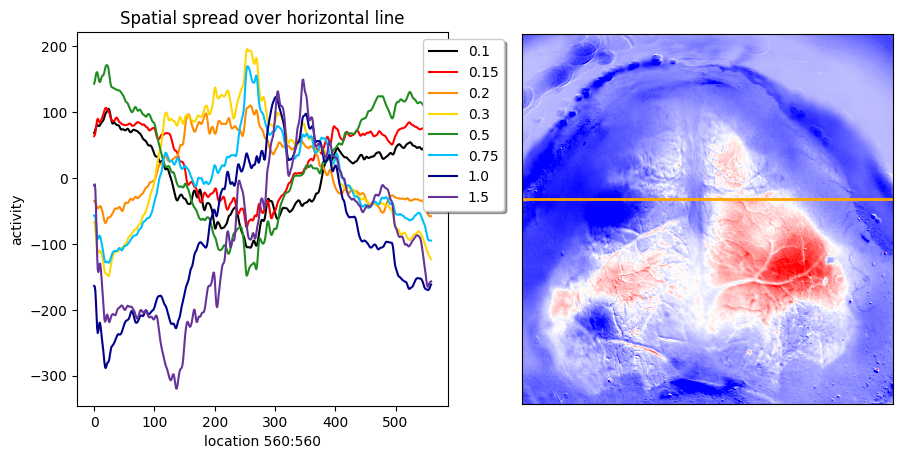

In [8]:
# spread across horizontal line
spreadByPower = []
f = plt.figure(figsize=(4*2, 3*2))
gs = mpl.gridspec.GridSpec(3, 4)
spatial = data822.svdSpatFull.reshape(560*560, -1)
for count,power in enumerate(np.unique(data822.laserPowers)):
    trials = np.squeeze(np.argwhere(data822.laserPowers==power)) # find trials
    time = [np.linspace(i+0.09, i+0.1, 100) for i in data822.laserOn[trials]] # find times for trials. length 50 bc 50 trials --> each have 100 times 

    activity = data822.tToWFManual(time) # 50x100x500. 50 trials, 100 times each, 500 components
    
    activity = np.mean(activity, axis=0) # 100x500. activity averaged across trials. 100 times, 500 compoennets, all an average of all trials
    
    dwf = [np.diff(i, prepend=i[0]) for i in activity] #100x500, just a correction
    dwf = np.array(dwf)
    avg = np.mean(dwf, axis=1)
    
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1) #560x560x100 pixelsxtime
    # videoAvg = np.mean(videoAvg, axis=2) # deleted bc averaging over time causes issues, since stim is on/off
    videoAvg = videoAvg[:,:,0] # 560x560. picking one time point. 
    videoROI = videoAvg[250, :] # 560 horizontal pixels. taken from avg activity, the average activity for all trials and all times accross one line 
    
    spreadByPower.append(videoROI)
spreadByPower = np.array(spreadByPower)


colors = ['black', 'red', 'darkorange','gold','forestgreen','deepskyblue','darkblue','rebeccapurple','mediumvioletred']
f = plt.figure(figsize=(4*5.5, 3*5.5))
gs = mpl.gridspec.GridSpec(3, 4)
ax = plt.subplot(gs[0])
for count,power in enumerate(np.unique(data822.laserPowers)):
    data = spreadByPower[count]
    data = gaussian_filter1d(data, sigma=2)
    plt.plot(data,c=colors[count]) 
plt.title("Spatial spread over horizontal line")
plt.xlabel("location 560:560")
plt.ylabel("activity")
ax.legend(np.unique(data822.laserPowers),loc='upper right', bbox_to_anchor=(1.17, 1),
          ncol=1, fancybox=True, shadow=True)
ax = plt.subplot(gs[1])
data822.fullAvg(trials=powTrials, start=0,stop=.5,step=100)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.axhline(y=250,c='orange',linewidth=2)

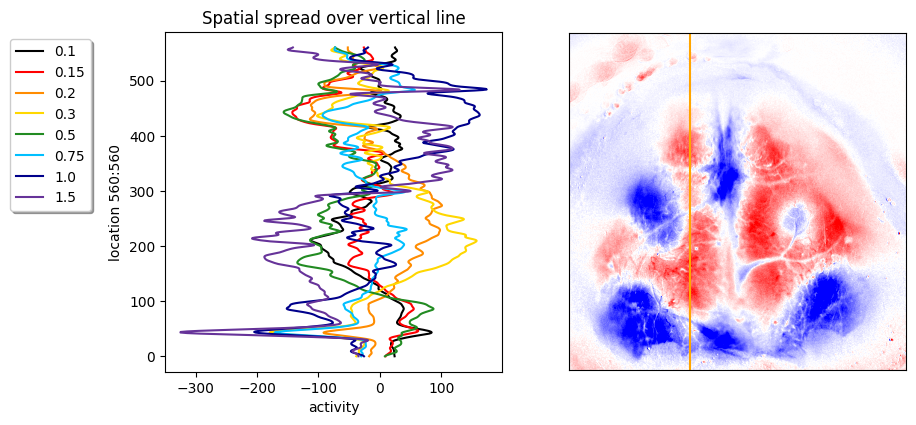

In [9]:
# spread across vertical line
spreadByPower = []
spatial = data822.svdSpatFull.reshape(560*560, -1)
for count,power in enumerate(np.unique(data822.laserPowers)):
    trials = np.squeeze(np.argwhere(data822.laserPowers==power))
    time = [np.linspace(i+0.09, i+0.1, 100) for i in data822.laserOn[trials]]
    activity = data822.tToWFManual(time)
    activity = np.mean(activity, axis=0)
    
    dwf = [np.diff(i, prepend=i[0]) for i in activity]
    dwf = np.array(dwf)
        
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1)
    videoAvg = videoAvg[:,:,0]
    videoROI = videoAvg[:, 200] # activity across one line
    
    spreadByPower.append(videoROI)
spreadByPower = np.array(spreadByPower)

colors = ['black', 'red', 'darkorange','gold','forestgreen','deepskyblue','darkblue','rebeccapurple','mediumvioletred']
f = plt.figure(figsize=(4*5, 3*5))
gs = mpl.gridspec.GridSpec(3, 4)
ax = plt.subplot(gs[0])
for count,power in enumerate(np.unique(data822.laserPowers)):
    data = spreadByPower[count]
    data = gaussian_filter1d(data, sigma=3)
    plt.plot(data,np.linspace(0,560,560),c=colors[count])  
plt.title("Spatial spread over vertical line")
plt.xlabel("activity")
plt.ylabel("location 560:560")
ax.legend(np.unique(data822.laserPowers),loc='upper right', bbox_to_anchor=(-.2, 1),
          ncol=1, fancybox=True, shadow=True)
ax = plt.subplot(gs[1])
powTrials = np.squeeze(np.argwhere(data822.laserPowers==1.5))
data822.fullAvg(trials=powTrials, start=0,stop=5,step=1000)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.axvline(x=200,c='orange')